# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.automl import AutoClassifier
from jcopml.utils import save_model, load_model

# 2. Import Dataset

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Change the data type of a 'Weekend' column

df['Weekend'] = df['Weekend'].astype('object')

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Data Description

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.describe(include='O')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


### Check Missing Value

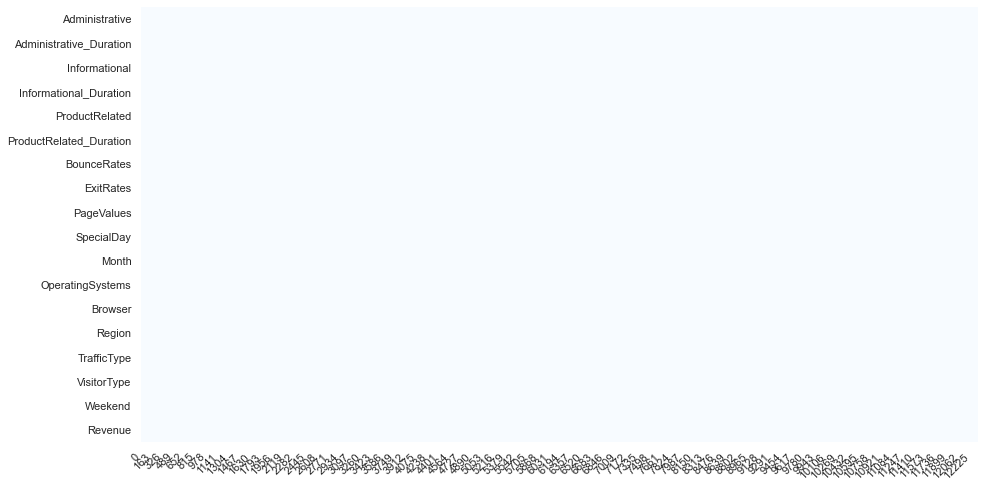

In [6]:
plot_missing_value(df)

### Plot Multiple Pairwise Bivariate Distributions

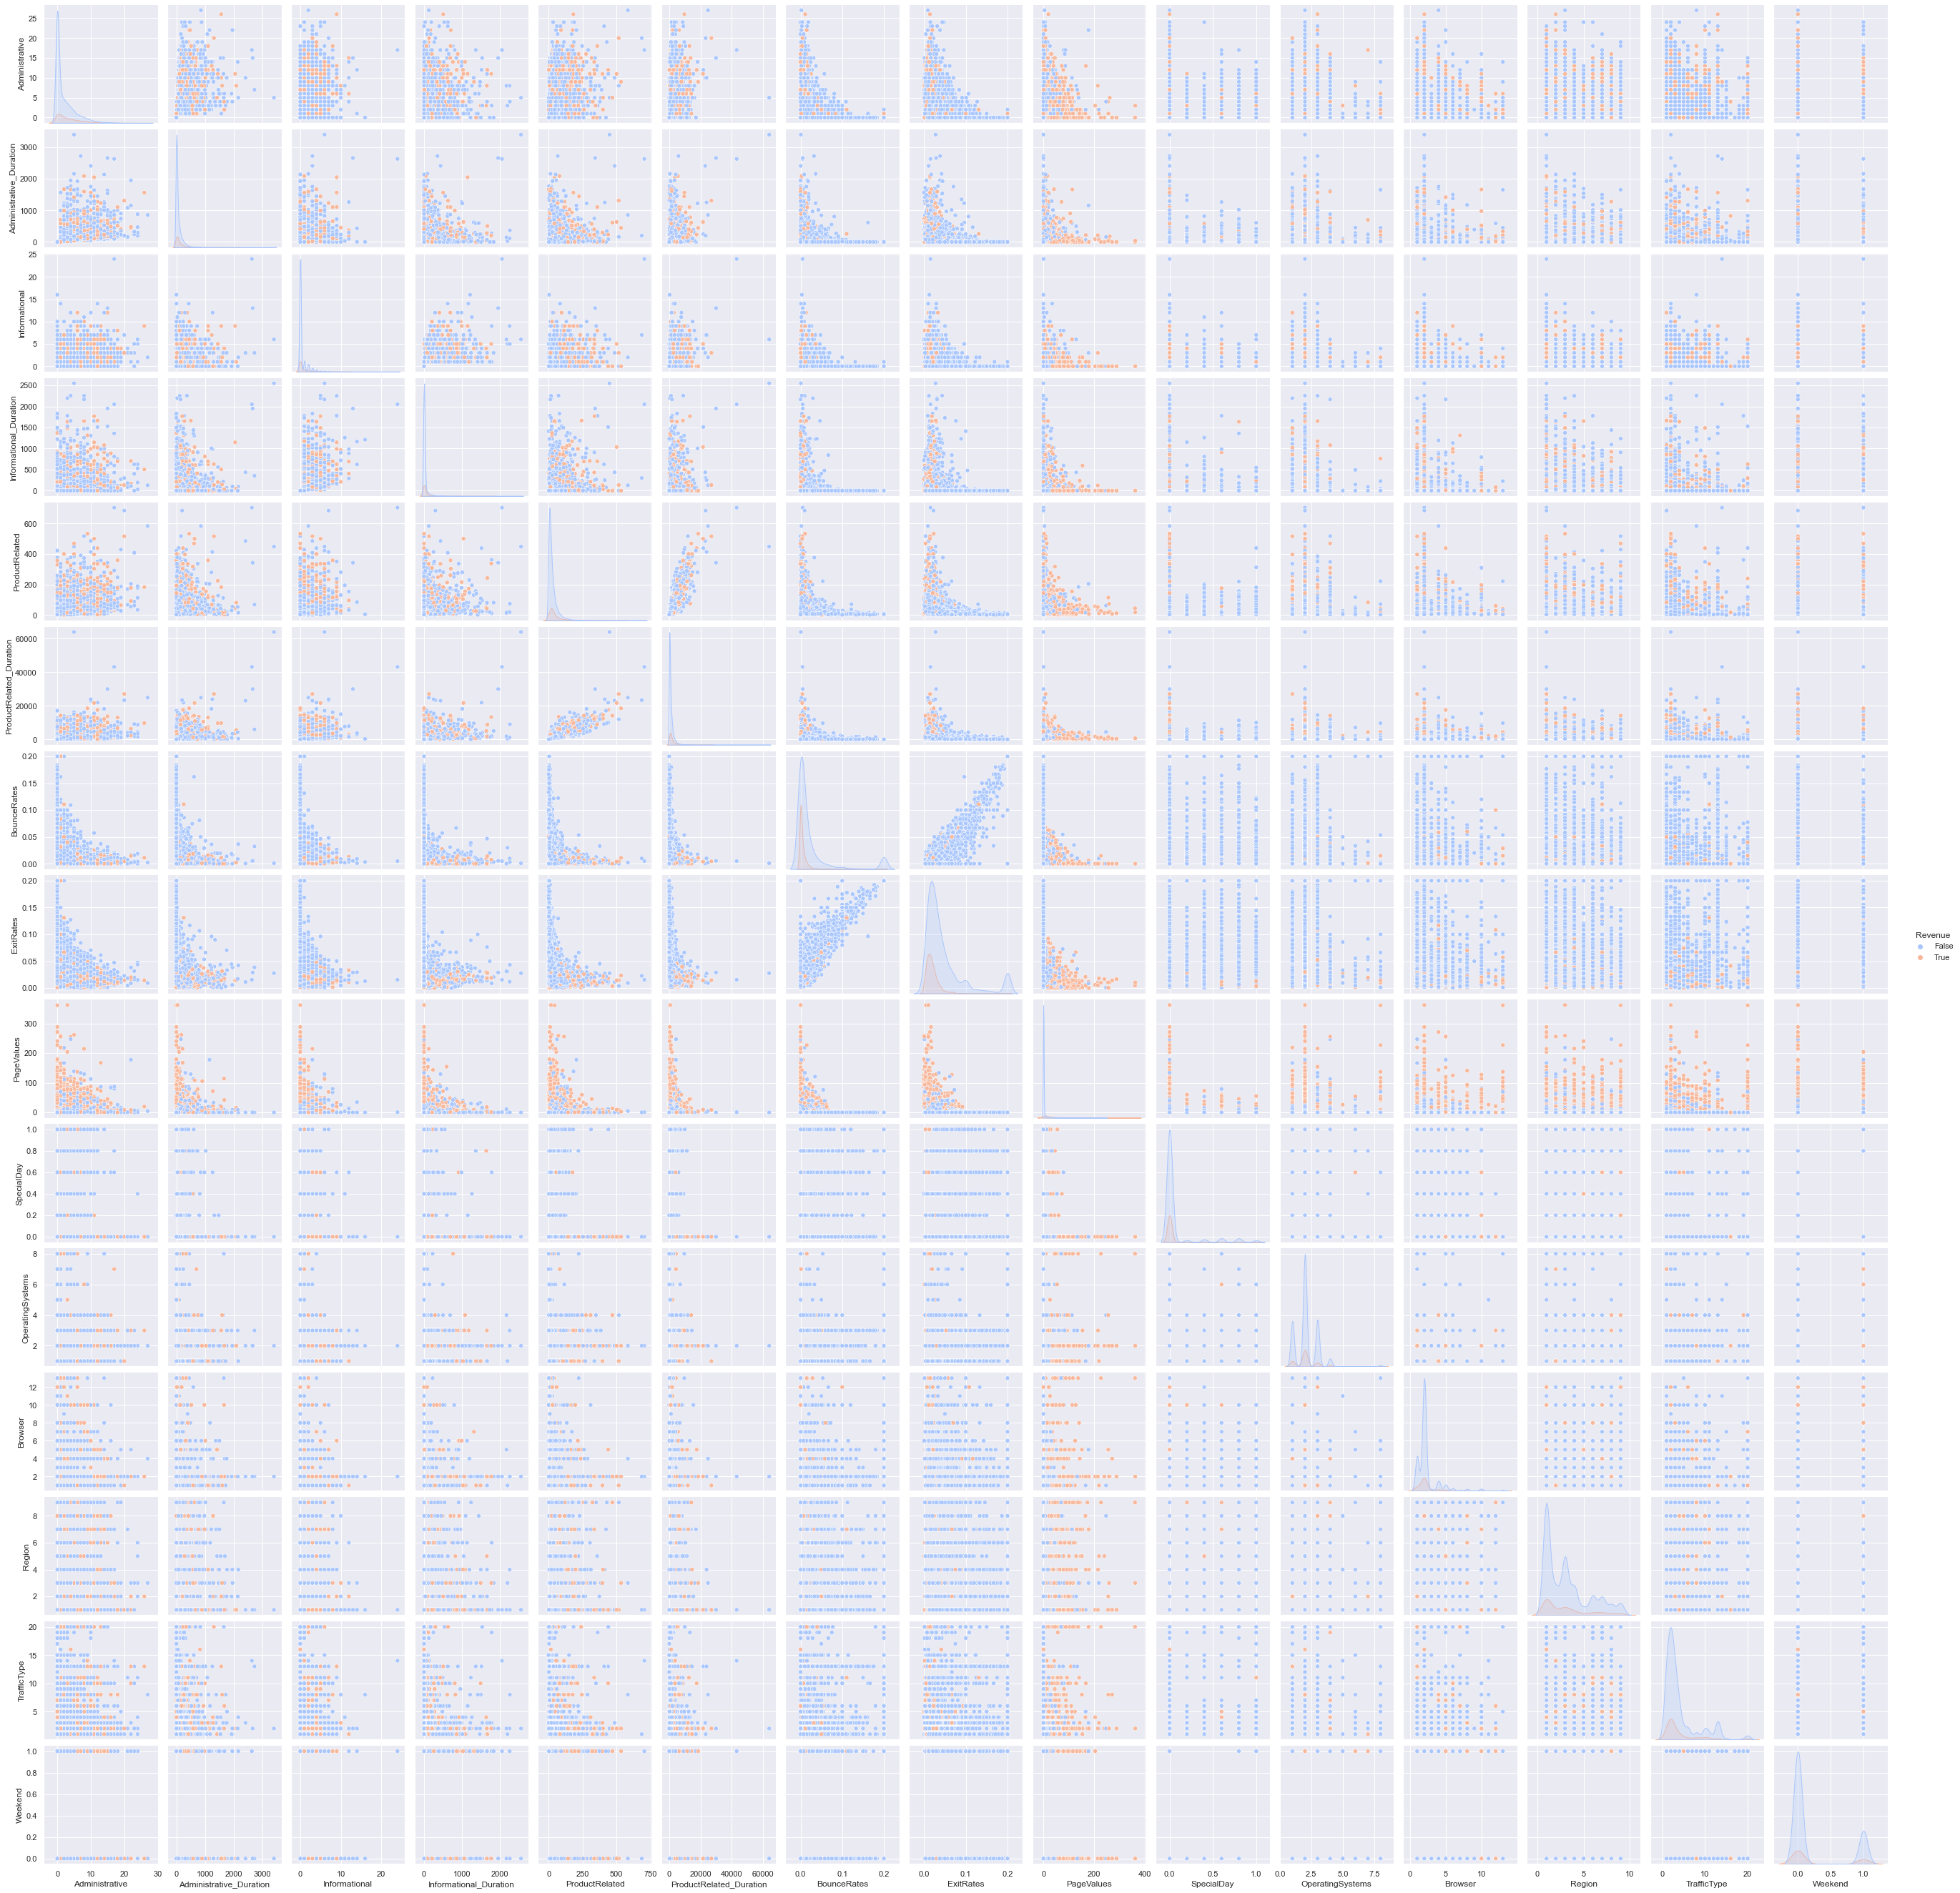

In [7]:
sns.pairplot(df,hue='Revenue', palette='coolwarm')

### Check Imbalance Dataset

<AxesSubplot:xlabel='Revenue', ylabel='count'>

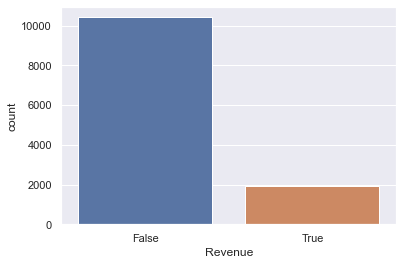

In [8]:
sns.countplot(df.Revenue)

In [9]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

`The ratio of the target variable is 0.84:0.15. That means the dataset is almost Imbalanced. Thus, I'll use 'accuracy' for scoring the model.`

# 3. Dataset Splitting

In [10]:
X = df.drop(columns="Revenue")
y = df.Revenue

# 4. Modeling

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
numeric = ['Administrative', 'Administrative_Duration', 'Informational',
           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']
categoric = ['Month','VisitorType','Weekend']

In [13]:
model1 = AutoClassifier(num_feature=numeric, cat_feature=categoric)

In [14]:
model1.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 43
algo__max_features        | 0.45539336635801275
algo__min_samples_leaf    | 8
algo__n_estimators        | 187

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=True, n_neighbors=5)
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.9409468775344688
Valid: 0.9061232765612327
Test : 0.9002433090024331


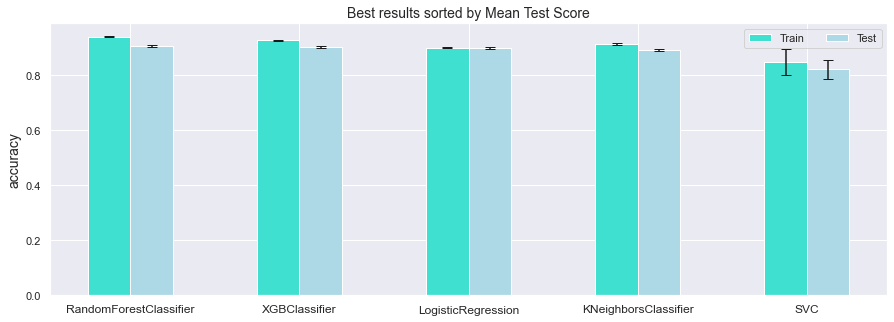

In [15]:
model1.plot_results()

# 5. Features Importance

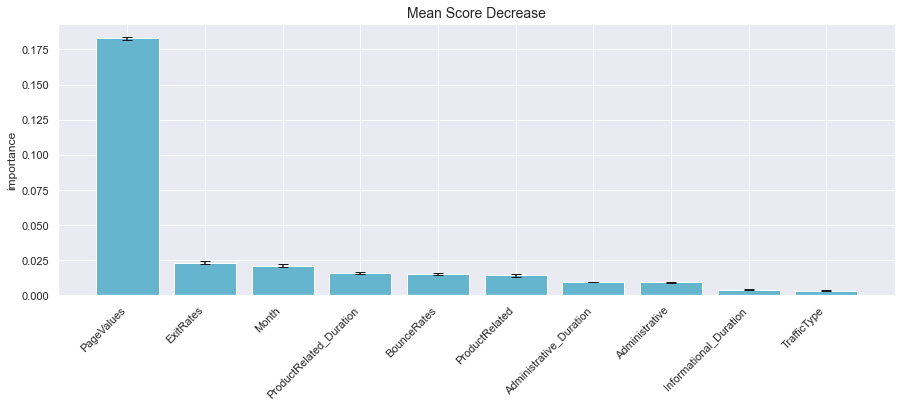

In [16]:
model1.mean_score_decrease()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [19]:
model2 = AutoClassifier(num_feature= ['PageValues','ExitRates','ProductRelated_Duration','BounceRates','ProductRelated','Administrative_Duration','Administrative','Informational_Duration','TrafficType'],
                        cat_feature=['Month'])

In [20]:
model2.fit(X, y, cv=3, scoring='accuracy', algo=['rf'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 78
algo__max_features        | 0.6486079005819072
algo__min_samples_leaf    | 2
algo__n_estimators        | 191

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='median')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.9854521492295215
Valid: 0.9058191403081913
Test : 0.9006488240064883


# 6. Evaluation

In [21]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_pr_curve, plot_roc_curve

In [22]:
X_train = model2.X_train
y_train = model2.y_train
X_test = model2.X_test
y_test = model2.y_test

## 6.1. Classification Report

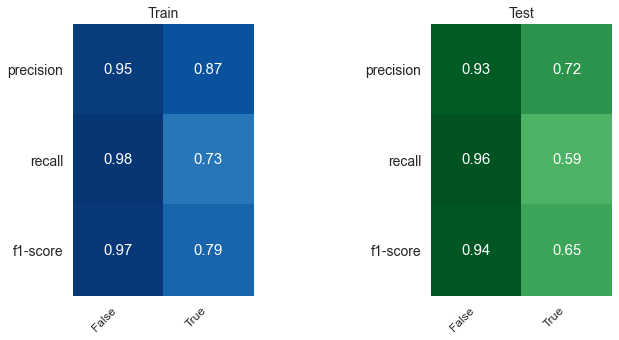

In [23]:
plot_classification_report(X_train, y_train, X_test, y_test, model1)

In [24]:
plot_classification_report(X_train, y_train, X_test, y_test, model1, report=True)

Train report
              precision    recall  f1-score   support

       False       0.95      0.98      0.97      8338
        True       0.87      0.73      0.79      1526

    accuracy                           0.94      9864
   macro avg       0.91      0.85      0.88      9864
weighted avg       0.94      0.94      0.94      9864


Test report
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.72      0.59      0.65       382

    accuracy                           0.90      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.90      0.90      2466



## 6.2. Precision vs Recall

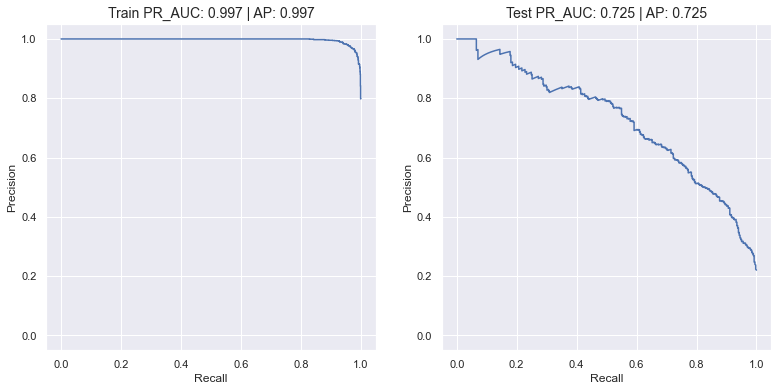

In [25]:
plot_pr_curve(X_train, y_train, X_test, y_test, model2.model) 

## 6.3. ROC AUC Curve

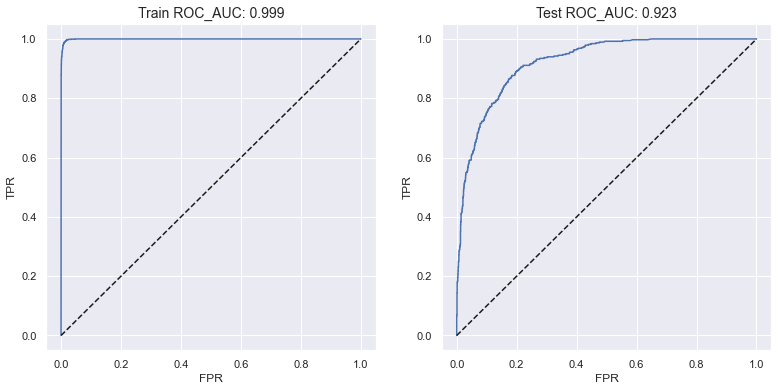

In [26]:
plot_roc_curve(X_train, y_train, X_test, y_test, model2.model) 

## 6.4. Confusion Matrix

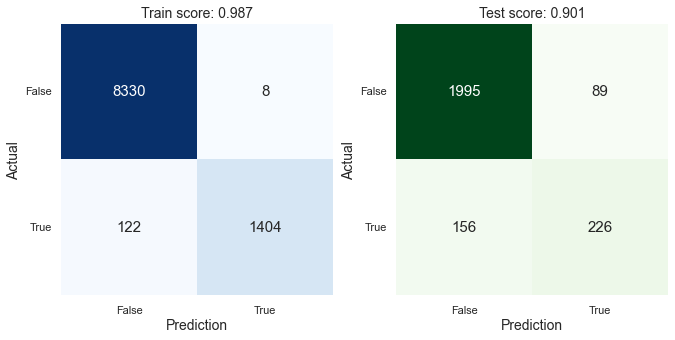

In [27]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model2.model)

# 7. Save Model

In [28]:
model2.save(fname= 'Online_Shoppers_Intention_Classification_AutoML_Baseline.pkl')

Model is pickled as model/Online_Shoppers_Intention_Classification_AutoML_Baseline.pkl
